In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pint
from scipy.optimize import curve_fit

plt.style.use(['science', 'notebook'])
u = pint.UnitRegistry()
# Air kerma strength units
u.define('U = uGy * m**2 / hour')

# Determine Largest Current

Load data

In [3]:
x_data = np.array([126.5,126.0,125.5,125.0,124.5,124.0,123.5]) / 100
I_data = np.array([-46.73,-47.01,-47.13,-47.10,-46.92,-46.58,-46.08,])

Fit function

In [4]:
def func(x,a,b,c):
    return a*(x-b)**2 + c
(a_opt, b_opt, c_opt),perr = curve_fit(func, x_data, I_data, p0=(100, 1.25, -47))

Get fit data

In [5]:
x = np.linspace(min(x_data), max(x_data),1000)
I = func(x,a_opt,b_opt,c_opt)

Plot

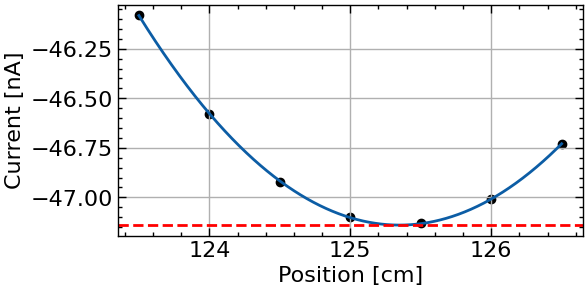

In [6]:
plt.figure(figsize=(6,3))
plt.scatter(x_data*100,I_data, color='k')
plt.plot(x*100,I)
plt.axhline(c_opt, color='r', ls='--')
plt.xlabel('Position [cm]')
plt.ylabel('Current [nA]')
plt.grid()
plt.savefig('Lab4Plots/quad.png', dpi=200)
plt.show()

In [7]:
c_opt

-47.139965017210706

# Determine Air Kerma

In [8]:
gamma = 0.1091 * u.uGy * u.m**2 / u.hour / u.MBq
I1 = np.abs(c_opt) * u.nA
I2 = 2829 * u.nC / (60 * u.s)
PE = 0.999 # from certificate
T_w = 21.1 + 273.15
P_air = 762.4
PTP = T_w/295.15 * 760/P_air 
Nk = 4.695e5 * u.Gy * u.m**2 / u.hour /u.A
t = pd.to_datetime('Mar 30 2022') - pd.to_datetime('Jan 24 2022')
t = t.days * u.day
lam = 0.00039 / u.hour

In [11]:
100*(5.445 - 5.442)/5.445

0.05509641873278445

From fit

In [16]:
Sk = Nk * I1* PE * PTP
Sk = Sk.to(u.U)
A = Sk / gamma
A = A.to(u.Ci)
print(f'Activity: {A:.5f}')
print(f'Air Kerma Strength: {Sk:.5f}')

Activity: 5.44338 curie
Air Kerma Strength: 21973.27188 U


From lab

In [12]:
Sk = Nk * I2* PE * PTP
Sk = Sk.to(u.U)
A = Sk / gamma
A = A.to(u.Ci)
print(f'Activity: {A:.5f}')
print(f'Air Kerma Strength: {Sk:.5f}')

Activity: 5.44453 curie
Air Kerma Strength: 21977.94947 U


From manufactorer

In [13]:
A0 = 10 * u.Ci
A = A0 * np.exp(-lam * t)
Sk = A * gamma
Sk = Sk.to(u.U)
print(f'Activity: {A:.5f}')
print(f'Air Kerma Strength: {Sk:.5f}')

Activity: 5.44221 curie
Air Kerma Strength: 21968.56613 U
